# McDonald's Review Analysis: 

                                                                                                Author: ManikantaReddy Annem

In [355]:
#Downloading the Packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [356]:
#Installing python Modules
!pip install textblob
!pip install WordCloud
!pip install vaderSentiment



In [357]:
#importing all the libraries and methods
import pandas as pd
from colorama import Fore, init
import re
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import pandas as pd
import random
from datetime import datetime, timedelta

import missingno as msno
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier

## 1. Opening and Reading Data

In [358]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding = 'latin1')

In [359]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


## 2. Data Preparation:

In the line df = df.dropna(), missing values in the dataset are addressed by removing entire rows where at least one value is missing. This is a common strategy when missing values are limited, and you prefer not to impute or estimate them.

#### 1. Handle missing values :

In [361]:

# Checking for missing values
missing_values = df.isnull().sum()
#dropna() method is used to remove rows containing missing values (NaN) from a DataFrame.
df = df.dropna()

#### 2. Standardizing Text Data:

In [363]:
# Assuming 'review' is the column with textual content
# Convert text to lowercase for consistency
df['review'] = df['review'].str.lower()

# Remove leading and trailing whitespaces
df['review'] = df['review'].str.strip()

# Remove numbers from text
df['review'] = df['review'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))


In [364]:

# As the 'review' column is the with textual content
# Remove stopwords from text
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
print(df['review'])

0        look like someone spit food ? normal transacti...
1        'd mcdonalds . far food atmosphere go . staff ...
2        made mobile order got speaker checked . line m...
3        mc . crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...
4        repeat order times drive thru , still manage m...
                               ...                        
33391                                      treated badly .
33392                                         service good
33393                                 remove hunger enough
33394                  's good , lately become expensive .
33395                                       took good care
Name: review, Length: 32736, dtype: object


C:\Users\reddy\AppData\Local\Temp\ipykernel_15256\1268409546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))


## 3. Feature Engineering:

In [365]:
df1 = df.copy()


In [366]:
# Drop columns 'store_name', 'category', 'latitude', 'longitude', and 'rating_count'
df1 = df1.drop(columns=['reviewer_id','store_name', 'category', 'latitude ', 'longitude', 'rating_count'])

In [367]:
df1.head(2)

,store_address,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,look like someone spit food ? normal transacti...,1 star
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,'d mcdonalds . far food atmosphere go . staff ...,4 stars


###### Store Address

In [368]:
df1[['store_address']].sample(4)

,store_address
6049,"262 Canal St, New York, NY 10013, United States"
905,"1698 US-209, Brodheadsville, PA 18322, United ..."
19084,"1100 N US Hwy 377, Roanoke, TX 76262, United S..."
32835,"3501 Biscayne Blvd, Miami, FL 33137, United St..."


In [369]:
df1[['City', 'State']] = df1['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))

In [370]:
df1[['City','State']].sample(4)

,City,State
12697,Los Angeles,CA 90044
21313,Las Vegas,NV 89119
2020,Queens,NY 11367
26474,Santa Monica,CA 90405


In [371]:
df1 = df1.drop(columns=['store_address'])

###### Review Time

In [372]:
df1[['review_time']].sample(10)

,review_time
11282,5 years ago
1093,2 years ago
16131,a year ago
19343,3 years ago
12737,3 years ago
23047,3 years ago
31676,5 years ago
27260,4 years ago
3191,9 months ago
20417,6 years ago


###### Rating

In [373]:
df1[['rating']].sample(10)

,rating
19594,5 stars
11249,1 star
10030,2 stars
2852,1 star
20855,5 stars
7799,2 stars
6082,4 stars
15470,1 star
5859,4 stars
18621,5 stars


In [374]:
df1.insert(5, "Star", df1["rating"].str.split(" ").str[0])

In [375]:
df1[['Star']].sample(10)

,Star
21453,2
33275,1
23980,5
25524,1
19647,5
26315,1
23148,4
668,5
9173,4
2136,2


In [376]:
df1 = df1.drop(columns=['rating'])

###### Review

In [377]:
unique_review = df1['review'].unique()
unique_review

array(['look like someone spit food ? normal transaction , everyone chill polite , dont want eat . im trying think milky white/clear substance food , * * * sure coming back .',
       "'d mcdonalds . far food atmosphere go . staff make difference . friendly , accommodating always smiling . makes pleasant experience many fast food places .",
       'made mobile order got speaker checked . line moving leave otherwise iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d late work . never got refund app . called said could get money back person stuck system . went person next day manager told wasnï¿',
       ..., 'remove hunger enough', "'s good , lately become expensive .",
       'took good care'], dtype=object)

In [378]:
def clean_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()

    stop_words = set(stopwords.words('english'))
    review_tokens = nltk.word_tokenize(review)
    review = ' '.join([word for word in review_tokens if word not in stop_words])

   
    return review

df1['clean_reviews'] = df1['review'].apply(clean_review)

print(df1[['clean_reviews']])

                                           clean_reviews
0      look like someone spit food normal transaction...
1      mcdonalds far food atmosphere go staff make di...
2      made mobile order got speaker checked line mov...
3      mc crispy chicken sandwich customer service qu...
4      repeat order times drive thru still manage mes...
...                                                  ...
33391                                      treated badly
33392                                       service good
33393                               remove hunger enough
33394                       good lately become expensive
33395                                     took good care

[32736 rows x 1 columns]


###### Unique Value

In [379]:
specified_columns = ['City', 'State', 'review_time', 'Star']

for col in specified_columns:
    total_unique_values = df1[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df1[col].value_counts()
    
    for i, (value, count) in enumerate(top_values.items()):

        print(f'{value}: {count}')

    print('\n' + '=' * 30 + '\n')  

Total unique values for City: 26
New York: 3486
Orlando: 3090
Austin: 1726
Kissimmee: 1720
North Hollywood: 1710
Fern Park: 1700
Dallas: 1650
Miami: 1570
Newark: 1290
San Diego: 1230
Roanoke: 1168
Queens: 1140
Los Angeles: 1034
Las Vegas: 1030
Brodheadsville: 1028
Voorhees Township: 943
Salt Lake City: 890
Fort Worth: 850
Santa Monica: 820
Sunnyvale: 800
Oak Park: 751
Washington: 683
San Antonio: 635
Champlain: 620
Annandale: 602
Miami Beach: 570


Total unique values for State: 36
FL 32819: 2380
NY 10001: 2070
FL 34746: 1720
CA 91602: 1710
FL 32730: 1700
TX 75203: 1650
FL 33137: 1570
NJ 07104: 1290
TX 76262: 1168
NY 11367: 1140
NY 10003: 1140
NV 89119: 1030
PA 18322: 1028
NJ 08043: 943
TX 78724: 926
UT 84106: 890
TX 76177: 850
CA 90405: 820
TX 78750: 800
CA 94086: 800
IL 60302: 751
FL 32837: 710
DC 20036: 680
CA 92109: 680
TX 78257: 635
NY 12919: 620
VA 22003: 602
FL 33139: 570
CA 90021: 550
CA 92111: 550
CA 90044: 481
NY 10013: 270
NY 10002: 3
CA 90025: 3
DC 20004: 3
NY 10038: 3


To

## 4.. Summary Statistics:

In [380]:
# Numerical Variables
numerical_summary = df1.describe()
print("Numerical Variables: \n", numerical_summary)


# Categorical Variables
categorical_summary = df['category'].value_counts()
print("Categorical Variables:\n", categorical_summary)


# Temporal Variables
temporal_range = df['review_time'].min(), df['review_time'].max()
print("Temporal Variables:\n ", temporal_range)


Numerical Variables: 
         review_time     review      City     State   Star clean_reviews
count         32736      32736     32736     32736  32736         32736
unique           39      21098        26        36      5         20413
top     4 years ago  excellent  New York  FL 32819      5     excellent
freq           6633       2175      3486      2380  10059          2178
Categorical Variables:
 category
Fast food restaurant    32736
Name: count, dtype: int64
Temporal Variables:
  ('10 months ago', 'a year ago')


## 5. Visualizations Of EDA:

In [381]:
df2 = df1.copy()


In [382]:
df2.head(3)

,review_time,review,City,State,Star,clean_reviews
0,3 months ago,look like someone spit food ? normal transacti...,Austin,TX 78750,1,look like someone spit food normal transaction...
1,5 days ago,'d mcdonalds . far food atmosphere go . staff ...,Austin,TX 78750,4,mcdonalds far food atmosphere go staff make di...
2,5 days ago,made mobile order got speaker checked . line m...,Austin,TX 78750,1,made mobile order got speaker checked line mov...


#### 1. Univariate Analysis

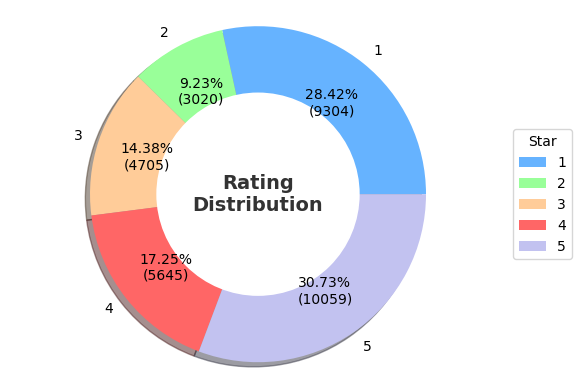

In [383]:
unique_star = df1['Star'].unique()

explode = [0] * len(unique_star)

sentiment_counts = df2.groupby("Star").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']  

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,  
    shadow=True
)
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Rating\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Star", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

###### Top 10 States by Frequency:

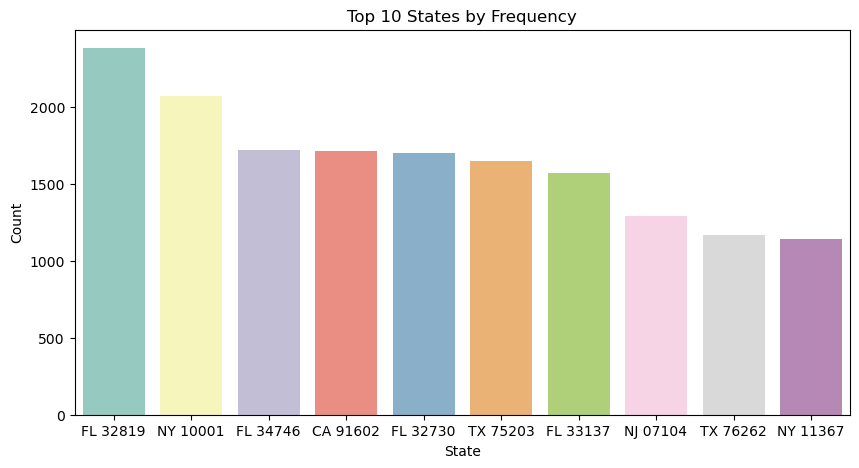

In [384]:
top_10_states = df2['State'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.set_palette("Set3")  
sns.countplot(x='State', data=df2, order=top_10_states.index)
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

###### Top 10 City by Frequency:

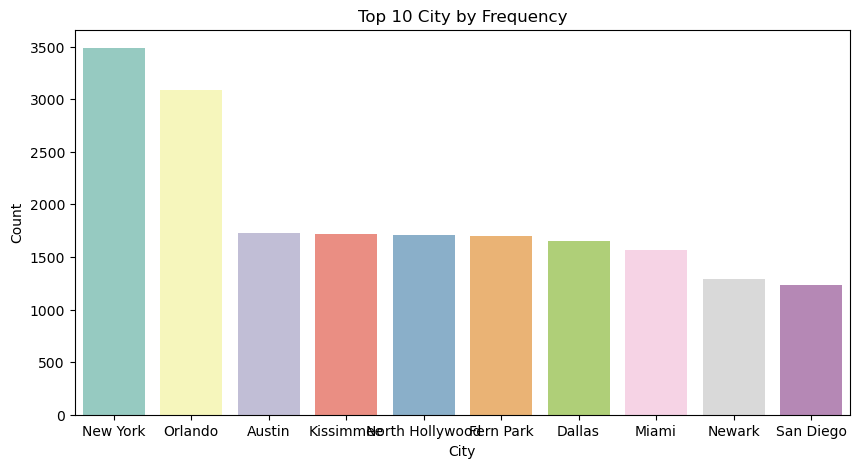

In [385]:
top_10_city = df2['City'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.set_palette("Set3")  
sns.countplot(x='City', data=df2, order=top_10_city.index)
plt.title('Top 10 City by Frequency')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

#### 2. Bivariate Analysis:

###### Distribution of Star Ratings by City:

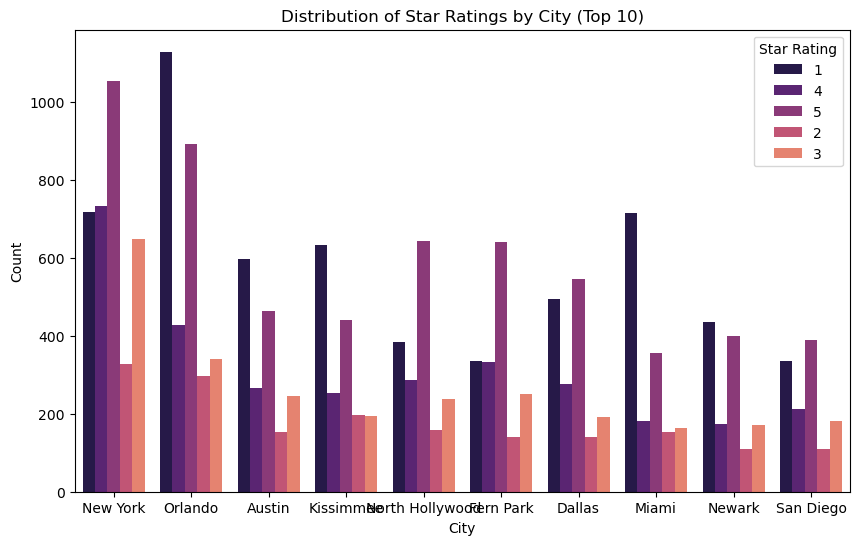

In [386]:
plt.figure(figsize=(10, 6))
sns.set_palette("magma") 
sns.countplot(x='City', hue='Star', data=df2, order=df2['City'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

###### Distribution of Star Ratings by State:

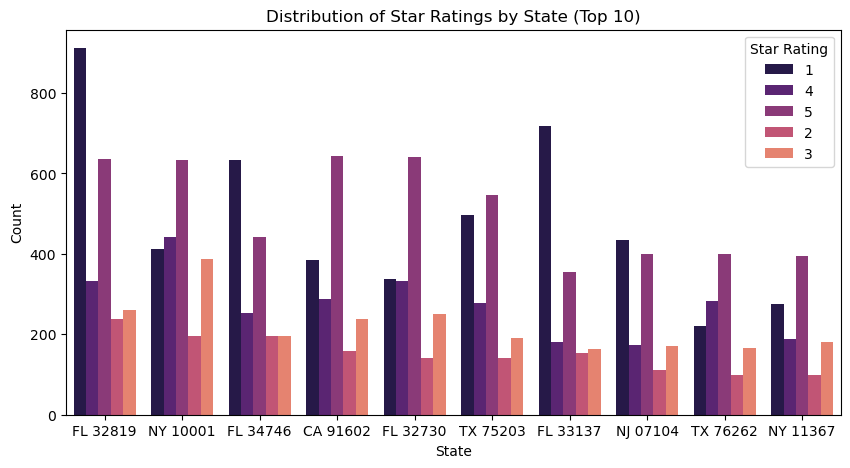

In [387]:
plt.figure(figsize=(10, 5))
sns.set_palette("magma") 
sns.countplot(x='State', hue='Star', data=df2, order=df2['State'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

##  6. Sentiment Analysis

In [388]:
df3 = df2.copy()
df3

,review_time,review,City,State,Star,clean_reviews
0,3 months ago,look like someone spit food ? normal transacti...,Austin,TX 78750,1,look like someone spit food normal transaction...
1,5 days ago,'d mcdonalds . far food atmosphere go . staff ...,Austin,TX 78750,4,mcdonalds far food atmosphere go staff make di...
2,5 days ago,made mobile order got speaker checked . line m...,Austin,TX 78750,1,made mobile order got speaker checked line mov...
3,a month ago,mc . crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,Austin,TX 78750,5,mc crispy chicken sandwich customer service qu...
4,2 months ago,"repeat order times drive thru , still manage m...",Austin,TX 78750,1,repeat order times drive thru still manage mes...
...,...,...,...,...,...,...
33391,4 years ago,treated badly .,Miami,FL 33137,1,treated badly
33392,a year ago,service good,Miami,FL 33137,5,service good
33393,a year ago,remove hunger enough,Miami,FL 33137,4,remove hunger enough
33394,5 years ago,"'s good , lately become expensive .",Miami,FL 33137,5,good lately become expensive


In [389]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32736 entries, 0 to 33395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_time    32736 non-null  object
 1   review         32736 non-null  object
 2   City           32736 non-null  object
 3   State          32736 non-null  object
 4   Star           32736 non-null  object
 5   clean_reviews  32736 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


In [390]:
df3 = df3[["Star","clean_reviews"]]
df3.head(4)

,Star,clean_reviews
0,1,look like someone spit food normal transaction...
1,4,mcdonalds far food atmosphere go staff make di...
2,1,made mobile order got speaker checked line mov...
3,5,mc crispy chicken sandwich customer service qu...


In [391]:
analyzer = SentimentIntensityAnalyzer()

df3['sentiment_score'] = df3['clean_reviews'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else'neutral'))

print(df3[['clean_reviews', 'sentiment_score', 'sentiment']].head())

                                       clean_reviews  sentiment_score  \
0  look like someone spit food normal transaction...           0.5541   
1  mcdonalds far food atmosphere go staff make di...           0.8591   
2  made mobile order got speaker checked line mov...          -0.2960   
3  mc crispy chicken sandwich customer service qu...           0.0000   
4  repeat order times drive thru still manage mes...          -0.7184   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


C:\Users\reddy\AppData\Local\Temp\ipykernel_15256\878817032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment_score'] = df3['clean_reviews'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
C:\Users\reddy\AppData\Local\Temp\ipykernel_15256\878817032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else'neutral'))


#### 6.1. Visualizing Sentiment Distribution

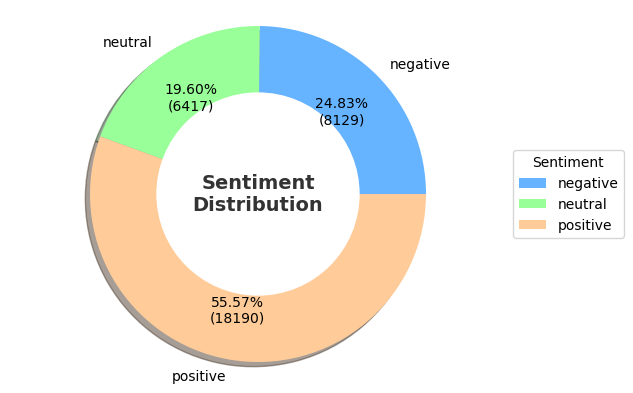

In [392]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.0, 0, 0)  

sentiment_counts = df3.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

#### 6.2 Common Words in Text Data:

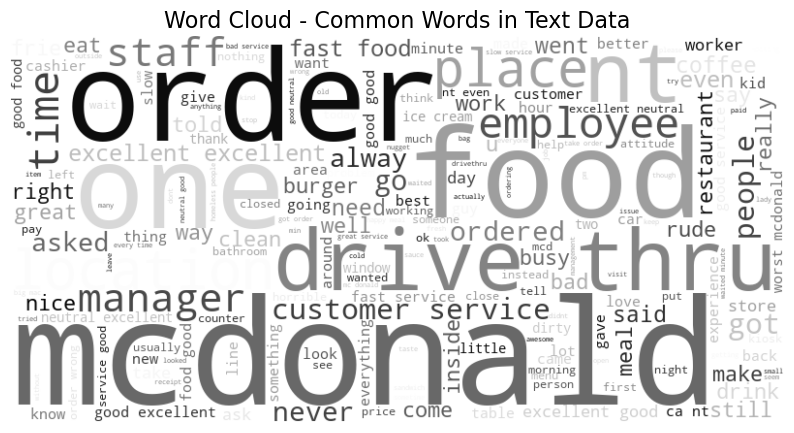

In [393]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the words into a single string for WordCloud
text_data = ' '.join(df3['clean_reviews'].astype(str))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='gray', contour_color='black').generate(text_data)

# Plot WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Words in Text Data', fontsize=16, color='black')
plt.show()


#### 6.3 Words in Positive Sentiment:

In [394]:
df3['temp_list'] = df3['clean_reviews'].apply(lambda x: str(x).split())
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

C:\Users\reddy\AppData\Local\Temp\ipykernel_15256\509796843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['temp_list'] = df3['clean_reviews'].apply(lambda x: str(x).split())


,Common_words,count
0,good,5146
1,food,4544
2,service,3482
3,mcdonald,2646
4,order,2521
5,excellent,2520
6,nt,2406
7,great,2212
8,place,2069
9,clean,1832


#### 6.4 Words in Netral Sentiment:

In [395]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,neutral,942
1,food,828
2,order,685
3,service,634
4,mcdonald,602
5,fast,545
6,drive,526
7,nt,454
8,get,404
9,slow,382


In [396]:
pd

<module 'pandas' from 'C:\\Users\\reddy\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

#### 6.5  Words in Negative Sentiment:

In [397]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,order,2849
1,food,2301
2,service,2002
3,nt,1793
4,get,1299
5,mcdonald,1255
6,drive,1106
7,worst,1085
8,bad,1071
9,rude,1062


## 7.Statistical Analysis

### 7.1 Correlation Heatmap

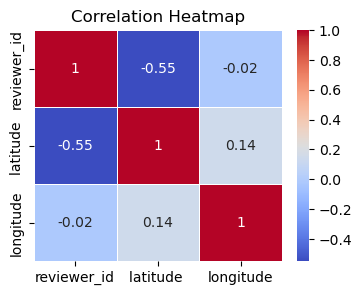

In [398]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Drop non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## 8. Performance Metrics

In [399]:
df['rating'] = df['rating'].str.split(' ').str[0].astype(int)

C:\Users\reddy\AppData\Local\Temp\ipykernel_15256\272637259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.split(' ').str[0].astype(int)


In [400]:
df3

,Star,clean_reviews,sentiment_score,sentiment,temp_list
0,1,look like someone spit food normal transaction...,0.5541,positive,"[look, like, someone, spit, food, normal, tran..."
1,4,mcdonalds far food atmosphere go staff make di...,0.8591,positive,"[mcdonalds, far, food, atmosphere, go, staff, ..."
2,1,made mobile order got speaker checked line mov...,-0.2960,negative,"[made, mobile, order, got, speaker, checked, l..."
3,5,mc crispy chicken sandwich customer service qu...,0.0000,neutral,"[mc, crispy, chicken, sandwich, customer, serv..."
4,1,repeat order times drive thru still manage mes...,-0.7184,negative,"[repeat, order, times, drive, thru, still, man..."
...,...,...,...,...,...
33391,1,treated badly,-0.4767,negative,"[treated, badly]"
33392,5,service good,0.4404,positive,"[service, good]"
33393,4,remove hunger enough,-0.2500,negative,"[remove, hunger, enough]"
33394,5,good lately become expensive,0.4404,positive,"[good, lately, become, expensive]"


### 1. Mean Squared Error (MSE)

In [401]:
from sklearn.metrics import mean_squared_error

# Assuming 'Star' contains the actual sentiment labels and 'sentiment' contains the predicted sentiment scores
actual_sentiment = df['rating']
predicted_sentiment = df3['sentiment_score']  # Assuming 'sentiment_score' contains the predicted sentiment scores

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(actual_sentiment, predicted_sentiment)
print("Mean Squared Error (MSE) for sentiment analysis:", mse)


Mean Squared Error (MSE) for sentiment analysis: 10.474022226077711



### 2. Accuracy, Precision, Recall, F1 Score

In [402]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert sentiment scores to sentiment labels
predicted_sentiment = df3['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Compute accuracy
accuracy = accuracy_score(df3['sentiment'], predicted_sentiment)

# Compute precision, recall, and F1 score
precision = precision_score(df3['sentiment'], predicted_sentiment, average='weighted')
recall = recall_score(df3['sentiment'], predicted_sentiment, average='weighted')
f1 = f1_score(df3['sentiment'], predicted_sentiment, average='weighted')

print("Accuracy:{:.2f}%".format(accuracy*100))
print("Precision:{:.2f}%".format(precision*100))
print("Recall:{:.2f}%".format(recall*100))
print("F1 Score:{:.2f}%".format(f1*100))


Accuracy:99.17%
Precision:99.18%
Recall:99.17%
F1 Score:99.16%


### 3. Cross Validation

In [403]:


# the dataset has a column named "clean_reviews" containing the reviews
reviews = df3['clean_reviews'].tolist()

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def calculate_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Create a copy of df3 to avoid SettingWithCopyWarning
df3_copy = df3.copy()

# Calculate sentiment scores for each review and assign them to the copy
df3_copy['sentiment_score'] = df3_copy['clean_reviews'].apply(calculate_sentiment_score)

# "sentiment_score" is the target variable for sentiment analysis
scores = cross_val_score(classifier, df3_copy[['sentiment_score']], df3_copy['sentiment'], cv=5)  # Change cv as needed

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean Cross-validation score:", scores.mean())


Cross-validation scores: [1.         1.         1.         0.99969452 1.        ]
Mean Cross-validation score: 0.9999389033144952
